In [66]:
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import io
csv_file = "output.csv"

In [67]:
key = "1awYH2gfv3J0TQvzi3jE7TmuNQ5gnq4AROAk_5bfAntE"
base_url = "https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
sheet_names = ['Before Cholecap', 'After Cholecap', 'Before Competitor A', 'After Competitor A', 'Before Competitor B', 'After Competitor B']
# response = requests.get(url)
# response.raise_for_status()  # This will raise an exception if there's an error
all_data = {}

# Fetch data for each sheet and store averages
for sheet in sheet_names:
    url = base_url.format(key=key, sheet_name=sheet)
    response = requests.get(url)
    response.raise_for_status()
    df = pd.read_csv(io.StringIO(response.text))
    all_data[sheet] = df.copy()

In [68]:
all_data['Before Competitor A'].head(1)

,Patient ID,Total Cholesteral Level,LDL Cholesterol Level,HDL Cholesterol Level,Triglycerides Level,Reported side effects
0,1006,211,135,54,175,NaN


In [69]:
def plot_cholesterol(dataframes_dict):
    for sheet_name, df in dataframes_dict.items():
        # Setting the positions and width for the bars
        pos = list(range(len(df['Total Cholesteral Level'])))
        width = 0.2

        # Plotting the bars
        fig, ax = plt.subplots(figsize=(10, 6))

        plt.bar(pos, 
                df['Total Cholesteral Level'], 
                width, 
                alpha=0.5, 
                color='blue', 
                label=df['Patient ID'][0])
        plt.bar([p + width for p in pos], 
                df['LDL Cholesterol Level'],
                width, 
                alpha=0.5, 
                color='red', 
                label=df['Patient ID'][0])
        plt.bar([p + (2*width) for p in pos], 
                df['HDL Cholesterol Level'],
                width, 
                alpha=0.5, 
                color='yellow', 
                label=df['Patient ID'][0])
        plt.bar([p + (3*width) for p in pos], 
                df['Triglycerides Level'],
                width, 
                alpha=0.5, 
                color='green', 
                label=df['Patient ID'][0])

        # Set the y-axis label
        ax.set_ylabel('Cholesterol Levels')

        # Set the chart's title
        ax.set_title('Total vs LDL vs HDL vs Triglyceride Cholesterol Levels by Patient')

        # Set the position of the x ticks
        ax.set_xticks([p + 0.5 * width for p in pos])

        # Set the labels for the x ticks
        ax.set_xticklabels(df['Patient ID'])

        # Adding the legend and showing the plot
        plt.legend(['Total Cholesterol', 'LDL Cholesterol', 'HDL Cholesterol', 'Triglycerides Level'], loc='upper left')
        plt.grid()
        plt.savefig(f"{sheet_name}_cholesterol_plot.png")
        plt.close()

# Assuming you have a dictionary named all_data that contains all the dataframes
plot_cholesterol(all_data)


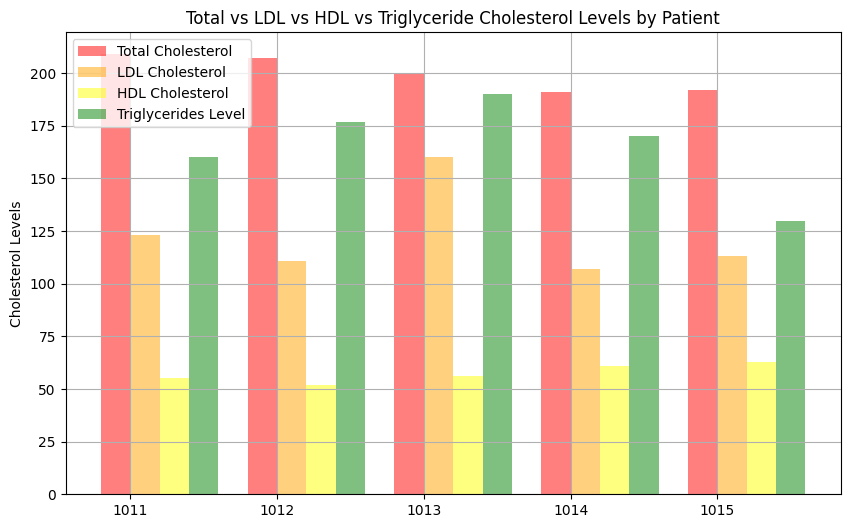

In [70]:
# Setting the positions and width for the bars
pos = list(range(len(df['Total Cholesteral Level'])))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar with 'Total Cholesterol Level' data,
# in position pos,
plt.bar(pos, 
        df['Total Cholesteral Level'], 
        width, 
        alpha=0.5, 
        color='red', 
        label=df['Patient ID'][0])
plt.bar([p + width for p in pos], 
        df['LDL Cholesterol Level'],
        width, 
        alpha=0.5, 
        color='orange', 
        label=df['Patient ID'][0])
plt.bar([p + (2*width) for p in pos], 
        df['HDL Cholesterol Level'],
        width, 
        alpha=0.5, 
        color='yellow', 
        label=df['Patient ID'][0])
plt.bar([p + (3*width) for p in pos], 
        df['Triglycerides Level'],
        width, 
        alpha=0.5, 
        color='green', 
        label=df['Patient ID'][0])

# Set the y-axis label
ax.set_ylabel('Cholesterol Levels')

# Set the chart's title
ax.set_title('Total vs LDL vs HDL vs Triglyceride Cholesterol Levels by Patient')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Patient ID'])

# Adding the legend and showing the plot
plt.legend(['Total Cholesterol', 'LDL Cholesterol', 'HDL Cholesterol', 'Triglycerides Level'], loc='upper left')
plt.grid()
plt.savefig("my_plot.png")
